In [194]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [195]:
from sklearn.datasets import make_classification

In [196]:
## Create  the dataset 

X,y = make_classification(n_samples=1000,n_features=10,n_classes=2, random_state=42)

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.30 , random_state=42)

In [198]:
# Model training

from sklearn.linear_model import LogisticRegression
logistic =  LogisticRegression()


In [199]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [200]:
y_pred = logistic.predict(X_test)

In [201]:
print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [202]:
from sklearn.metrics  import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score


In [203]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))


0.8466666666666667
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



### Hyper tuning

In [204]:
model = LogisticRegression()
penalty = ['l1' ,'l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver =  ['newton-cg','lbfgs','liblinear','sag','saga']

In [205]:
params = dict(penalty = penalty , C = c_values,solver = solver )

In [206]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [207]:
## GridSearch CV 
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy', cv =cv ,n_jobs = -1)

In [208]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [209]:
grid.fit(X_train,y_train)

c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Lenovo\new\Data-Science-Course\.venv\

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [210]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [211]:
grid.best_score_

np.float64(0.8785714285714287)

In [212]:
## Randomized SerachCV
model = LogisticRegression()
from sklearn.model_selection import RandomizedSearchCV

randomcv = RandomizedSearchCV(estimator=model,param_distributions=params,scoring='accuracy', cv =5 ,n_jobs = -1)

In [213]:
randomcv.fit(X_train,y_train)

c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Lenovo\new\Data-Science-Course\.venv\Li

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [214]:
randomcv.best_score_

np.float64(0.8742857142857143)

In [215]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}

In [216]:
randomcv.best_estimator_

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [217]:
y_pred= randomcv.predict(X_test)

In [218]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.8533333333333334
[[123  12]
 [ 32 133]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       135
           1       0.92      0.81      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



In [219]:
## Logistic Regression for multiclass Classification Problem

X,y = make_classification(n_samples=1000 , n_features=10 ,n_informative=3 , n_classes= 3 , random_state=15)

In [220]:
y

array([2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2,

In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.30 , random_state=42)

In [222]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(X_train , y_train)
y_pred = logistic.predict(X_test)

c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [223]:
y_pred

array([2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2])

In [224]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.79
[[84 10  8]
 [ 3 74 25]
 [10  7 79]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.81      0.73      0.77       102
           2       0.71      0.82      0.76        96

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



In [225]:
## Logistic regression for imbalanced Dataset 

from collections import Counter 
from sklearn.datasets import make_classification

In [226]:
## imbalanced dataset 

X,y = make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
                          n_redundant=0,weights = [0.99],random_state = 10)



In [227]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]], shape=(10000, 2))

In [228]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [229]:
import seaborn as sns 
import pandas as pd


In [230]:
a = pd.DataFrame(X)[0]

In [231]:
b = pd.DataFrame(X)[1]

<Axes: xlabel='0', ylabel='1'>

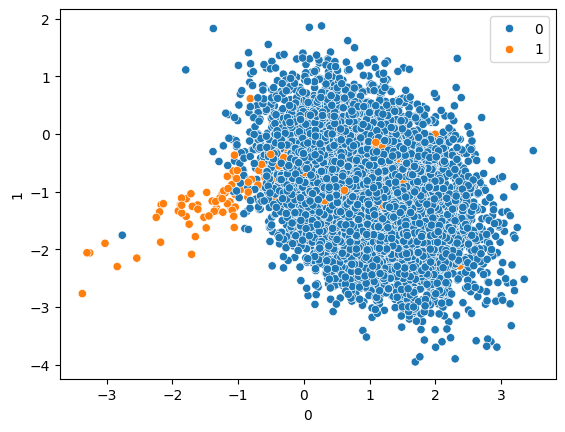

In [232]:
import seaborn as sns

# Correct usage with keyword arguments
sns.scatterplot(x=a, y=b, hue=y)


In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25 , random_state=0)

In [234]:
## Hyper parameter 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1' ,'l2','elasticNet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg' , 'lbfgs' , 'liblinear' ,'sag','saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [235]:
paramas = dict(penalty = penalty , C=c_values,solver = solver ,class_weight= class_weight)

In [236]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [237]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [238]:
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy', cv =cv ,n_jobs = -1)

In [239]:
grid.fit(X_train,y_train)

c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Lenovo\new\Data-Science-Course\.venv\

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [240]:
grid.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [241]:
y_pred = grid.predict(X_test)

In [242]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9888
[[2469    1]
 [  27    3]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2470
           1       0.75      0.10      0.18        30

    accuracy                           0.99      2500
   macro avg       0.87      0.55      0.59      2500
weighted avg       0.99      0.99      0.98      2500



In [243]:
## Logic regression using Roc and auc 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot 

In [244]:
X,y = make_classification(n_samples = 1000 , n_classes= 2 , random_state= 1)

In [245]:
X_train ,X_test , y_train, y_test = train_test_split(X,y,test_size= 0.25, random_state=15)

In [246]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [247]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [248]:
model_prob = model.predict_proba(X_test)


In [249]:
model_prob

array([[4.82913678e-01, 5.17086322e-01],
       [1.59432381e-02, 9.84056762e-01],
       [1.42382664e-02, 9.85761734e-01],
       [1.64315121e-02, 9.83568488e-01],
       [8.95253594e-01, 1.04746406e-01],
       [4.12489994e-02, 9.58751001e-01],
       [7.22365862e-01, 2.77634138e-01],
       [1.88167198e-03, 9.98118328e-01],
       [8.89637835e-01, 1.10362165e-01],
       [2.17805000e-01, 7.82195000e-01],
       [6.28806147e-01, 3.71193853e-01],
       [6.49002716e-01, 3.50997284e-01],
       [5.73497911e-01, 4.26502089e-01],
       [4.96725863e-01, 5.03274137e-01],
       [9.96069549e-01, 3.93045117e-03],
       [1.71854382e-01, 8.28145618e-01],
       [8.28612748e-01, 1.71387252e-01],
       [2.64065153e-01, 7.35934847e-01],
       [3.47614363e-01, 6.52385637e-01],
       [1.52843805e-01, 8.47156195e-01],
       [4.92763545e-01, 5.07236455e-01],
       [8.98997177e-01, 1.01002823e-01],
       [2.08109099e-02, 9.79189090e-01],
       [2.87601984e-01, 7.12398016e-01],
       [9.493205

In [250]:
print(model_prob.shape)


(250, 2)


In [251]:
model_prob = model.predict_proba(X_test)


In [252]:
model_prob = model_prob[:, 1]


In [253]:
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.906522855675398


In [254]:
dummy_fpr ,dummy_tpr , _ = roc_curve(y_test, dummy_model_prob)
model_fpr , model_tpr , thresholds = roc_curve(y_test,model_prob)

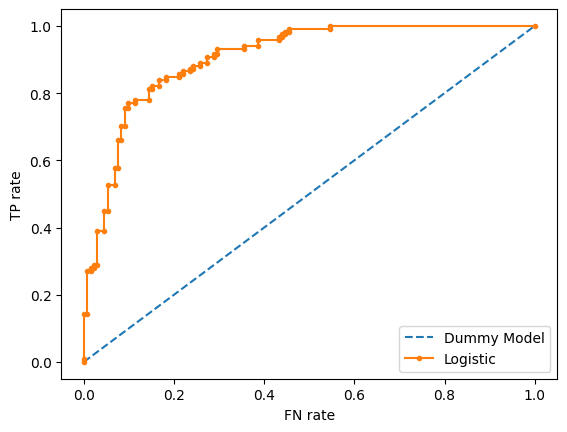

In [255]:
pyplot.plot(dummy_fpr,dummy_tpr,linestyle = '--',label = 'Dummy Model')
pyplot.plot(model_fpr,model_tpr , marker = '.',label = 'Logistic')


pyplot.xlabel("FN rate")
pyplot.ylabel("TP rate")


pyplot.legend()

pyplot.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18372\3056885237.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


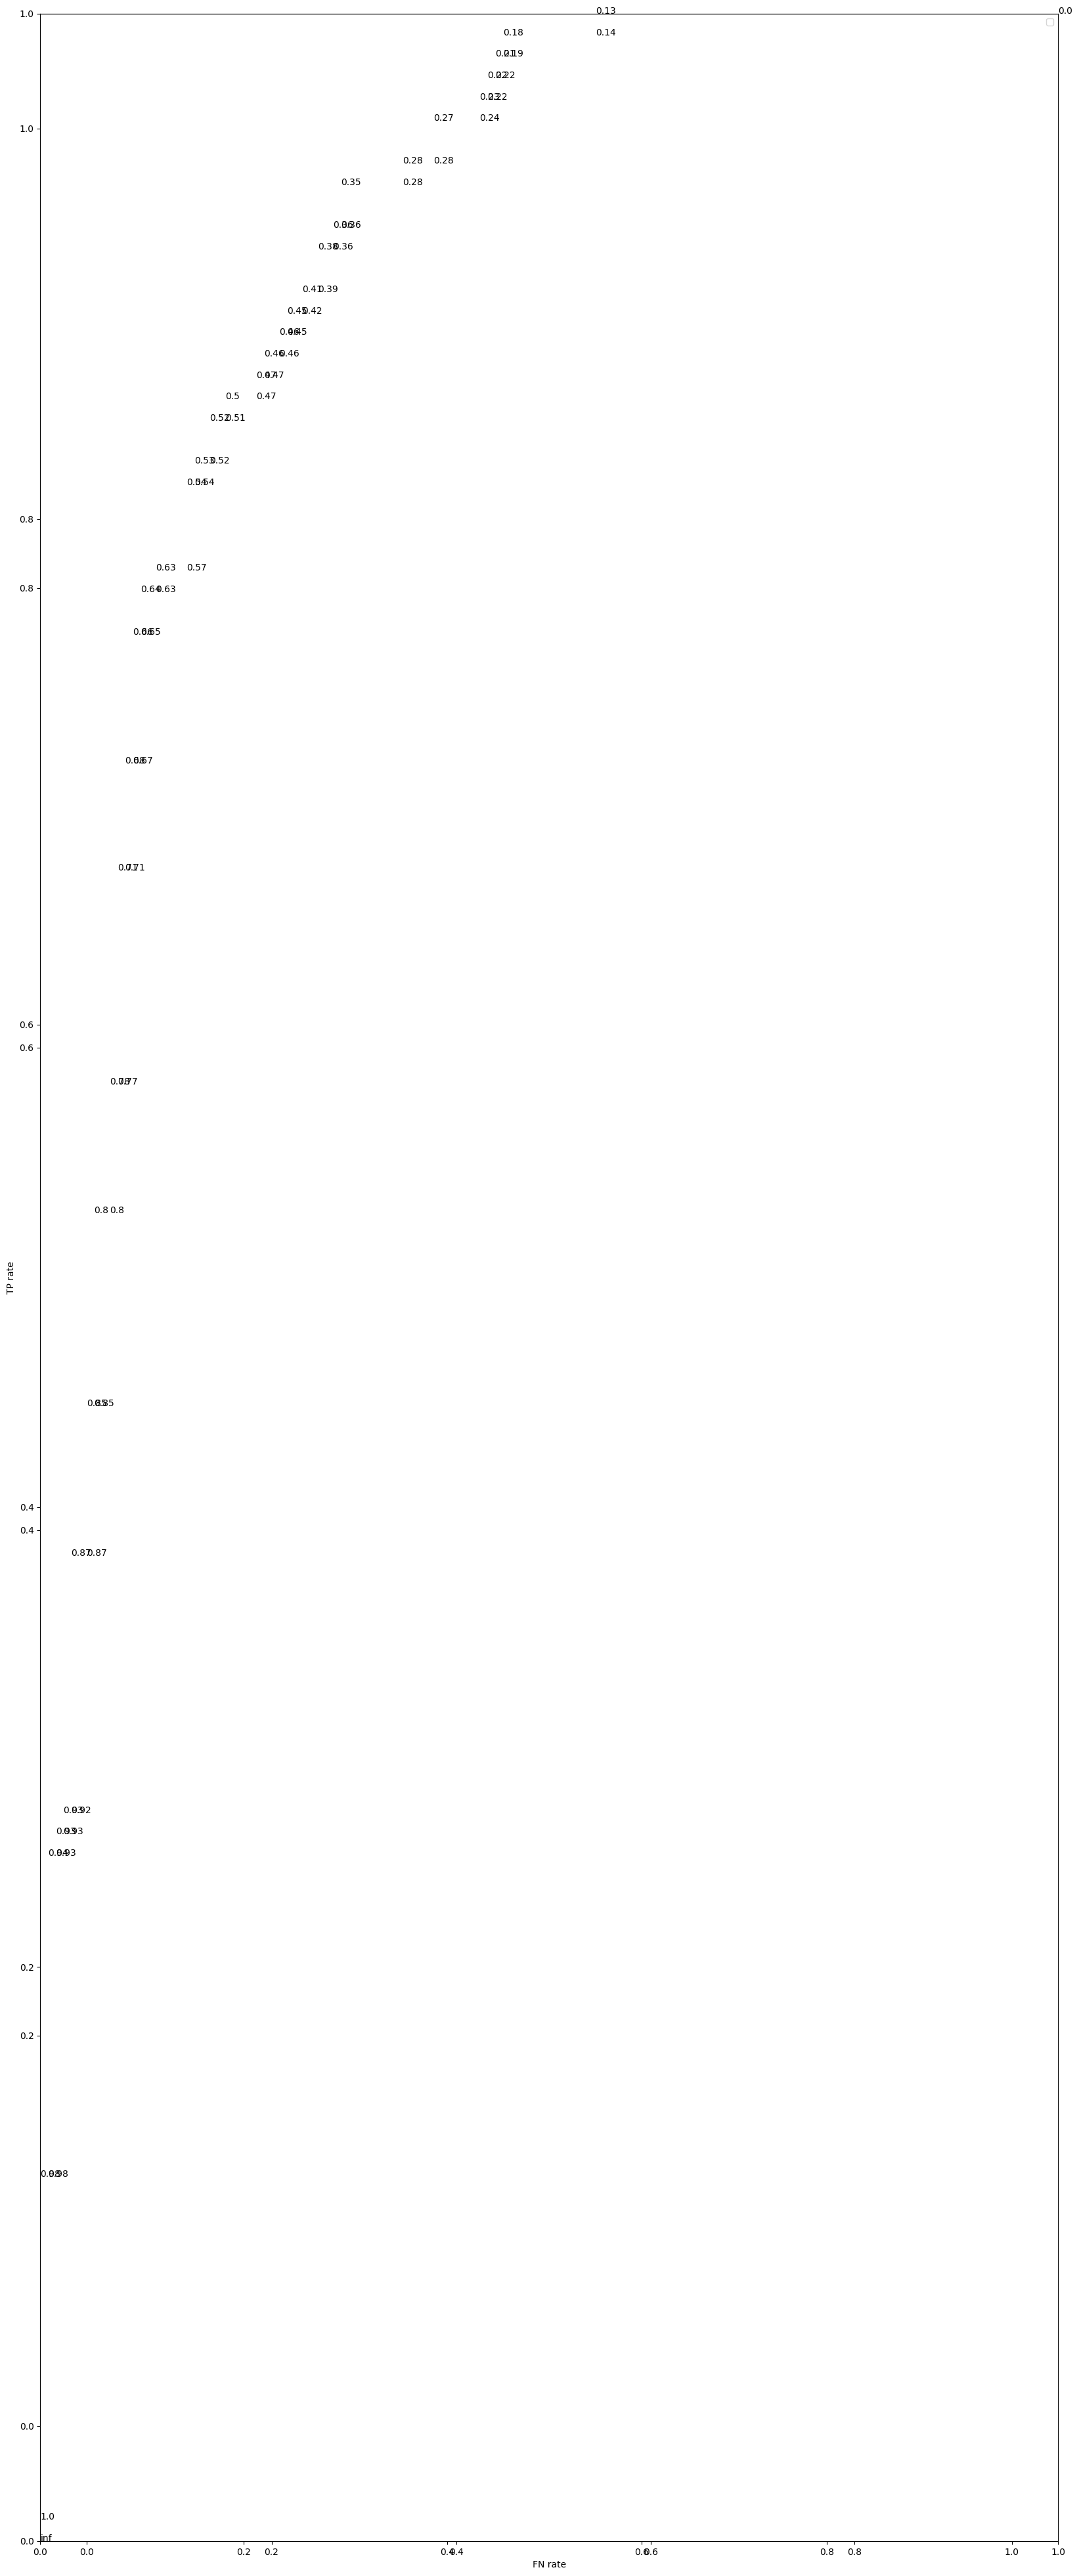

In [256]:
import numpy as np 

fig = pyplot.figure (figsize = (20,50))
pyplot.plot(dummy_fpr,dummy_tpr,linestyle = '--', label = 'Dummy Model')
pyplot.plot(model_fpr,model_tpr , marker = '.',label = 'Logistic')
ax= fig.add_subplot(111)
for xyz in zip(model_fpr , model_tpr , thresholds):
    ax.annotate('%s' % np.round(xyz[2],2) ,xy = (xyz[0] , xyz[1]))

pyplot.xlabel("FN rate")
pyplot.ylabel("TP rate")


pyplot.legend()

pyplot.show()

